In [1]:
%matplotlib inline
import random
random.seed(1234)
from string import punctuation
import pandas as pd
import gzip
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# import nltk
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import spacy
import matplotlib.pyplot as plt
import pyLDAvis #python library for interactive topic model visualization
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

# import gensim.downloader
# w2v = gensim.downloader.load('word2vec-google-news-300')

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# import warnings
# warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle
import numpy as np

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
# import pyLDAvis
# import pyLDAvis.sklearn
# import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm as tqdm
tqdm.pandas()
import math
import nltk
from collections import defaultdict

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
from nltk.probability import FreqDist
from gensim.models.ldamulticore import LdaMulticore
from nltk import tokenize

stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

from numpy import dot
from numpy.linalg import norm
import random

import itertools

#nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

from nltk.tokenize import sent_tokenize

from sklearn.preprocessing import MinMaxScaler
from nltk import pos_tag

# Read Data

In [ ]:
# df = pd.read_csv('./all_df.csv', index_col = False)

In [ ]:
# df0 = df.loc[(df.category_2 == 'Cats')]
# df1 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Food') ]
# df2 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Beds & Furniture')] 
# df3 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Litter & Housebreaking')]
# df4 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Toys')]
# df5 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Treats')]
# df6 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Grooming') ]
# df7 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Feeding & Watering Supplies') ]
# df8 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Cat Flaps, Steps, Nets & Pens') ]
# df9 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Collars, Harnesses & Leashes') ]
# df10 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Health Supplies')]
# df11 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Educational Repellents')]
# df12 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Carriers & Strollers')]
# df13 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Cages')]
# df14 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Memorials')]
# df15 = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Apparel')]

In [ ]:
# with open ('./model/df1.pickle', 'wb') as handle:
#     pickle.dump(df1, handle)

In [2]:
with open ('./model/df1.pickle', 'rb') as handle:
    df1 = pickle.load(handle)

In [3]:
df1.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,salesRank,imUrl,brand,categories,description,category_1,category_2,category_3,category_4,category_5
7723,7723,A11W8BQHCSU0RA,B00008437P,Connie Gelfer,"[0, 0]",I found these on sale and bought them on a whi...,5.0,need more!,1379462400,"09 18, 2013",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7724,7724,A2J5FJRZV4994H,B00008437P,"D. Bors ""Dors""","[1, 1]","My kittens were crazy over these, but as they ...",4.0,Favorite for some cats,1354579200,"12 4, 2012",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7725,7725,A7NB0VU0UQ88D,B00008437P,Gail Aslin,"[1, 1]",My cat absolutely loves spinners! She carries...,5.0,Best Cat Toy Ever!,1366675200,"04 23, 2013",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7726,7726,A1CV90TGSKF3DT,B00008437P,Jennifer,"[1, 2]",these were TINY and made out of very lightweig...,1.0,"TINY, CHEAPLY MADE, CAT CHOKED",1335744000,"04 30, 2012",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN
7727,7727,AZVMWL9E4T9ZD,B00008437P,"JR Dixey ""I am a technophile and librarian in...","[0, 0]",I bought this cat toy thinking that I would us...,5.0,For Birds Too!,1389398400,"01 11, 2014",...,{'Pet Supplies': 84866},http://ecx.images-amazon.com/images/I/51R535q-...,NaN,"[['Pet Supplies', 'Cats', 'Food']]",Crazy Spinners will drive your cat crazy! Perf...,Pet Supplies,Cats,Food,NaN,NaN


# Get attributes

In [4]:
def clean(sentence, stop_words, lemmatize = True):
    '''
    Clean sentence. 
            Parameters:
                    sentence (string): A string. 
                    stop_words (list): A list of words to be removed from a sentence. 
                    Lemmatize (boolean): A boolean to indicate whether or not to run lemmatization. . 
                    
            Returns:
                    _ (list): A list of cleaned tokens. 
    '''
    sen0 = ' '.join([word for word in str(sentence).split() if word.lower() not in stop_words])
    sen1 = sen0.translate(str.maketrans('', '', punctuation))
    tokens1 = [word for word in str(sen1).split() if word.lower() not in stop_words]
    return tokens1
    if lemmatize:
        sen2 = ' '.join(tokens)
        tokens1 = [lemmatizer.lemmatize(word) for word in tokens] 
        #tokens2 = [word.lemma_ for word in nlp(tokens)] 
    return tokens1

# def sent_to_words(sentences):
#     '''
#     Simplify and tokenize strings in an iterable.
    
#             Parameters:
#                     sentences (iterable): Review strings in a list or as a pandas.series.
                    
#             Returns:
#                     _ (generator): Simplify review tokens.  
#     '''
#     for sentence in sentences:
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def get_bigrams(data_words): 
    '''
    Form bigram.
    
        Parameters:
            data_words (iterable): token lists in an iterable. 

        Returns:
           _, _, bigram_pmi (data frame): Bigrams and their pmi scores in a Data Frame. 
    '''
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = nltk.collocations.BigramCollocationFinder.from_documents(data_words) 
    finder.apply_freq_filter(20)
    bigram_scores = finder.score_ngrams(bigram_measures.pmi) 
    bigram_pmi = pd.DataFrame(bigram_scores)
    bigram_pmi.columns = ['bigram', 'pmi']
    bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
    return finder, bigram_measures, bigram_pmi

def bigram_filter(bigram):
    """
    Filter bigram. 
        
        Parameters:
            bigram (string): A bigram.

        Returns:
           _ (boolean): Decide whether or not to keep the bigram.
    """
    stop_words = stopwords.words('english')   
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']: #we only want adjective + noun
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words: 
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram: 
        return False
    if len(bigram[0]) <= 2 or len(bigram[1]) <= 2:
        return False
    return True

def get_trigrams(data_words): 
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    finder = nltk.collocations.TrigramCollocationFinder.from_documents(data_words) 
    finder.apply_freq_filter(20)
    trigram_scores = finder.score_ngrams(trigram_measures.pmi)

    trigram_pmi = pd.DataFrame(trigram_scores)
    trigram_pmi.columns = ['trigram', 'pmi']
    trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
    return finder, trigram_measures, trigram_pmi

def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    stop_words = stopwords.words('english')
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
        return False
    if 'PRON' in trigram:
        return False
    if len(trigram[0]) <= 2 or len(trigram[1]) <= 2 and len(trigram[2]) <= 2:
        return False
    return True 

def replace_ngram(x, bigrams, trigrams):
    '''
    Form ngram. 
        
        Parameters:
            bigram (string): a ngrams.

        Returns:
           x (string): A connected ngrams with underscore.  
    '''
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

def remove_stopwords(texts, extra_stopwords = []):
    '''
    Remove stopwords in an iterable (string or tokens).

        Parameters:
                texts (iterable): Review strings in a list or as a pandas.series.

        Returns:
                _ (list): Simplify review stirngs without stopwords.  
    '''
    stop_words = stopwords.words('english') + extra_stopwords
    return [[word for word in doc.split() if word not in stop_words] for doc in texts]

# def lemmatize_skip_ngrams(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     '''feed tokens'''
#     nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
#     texts_out = []
#     for sent in texts:
#         doc = nlp(' '.join(sent)) 
#         if len(allowed_postags) > 0: 
#             returned_doc = []
#             for token in doc:
#                 if '_' in token.text:
#                     returned_token = token.text
#                 if token.pos_ in allowed_postags and '_' not in token.text:
#                     returned_token = token.lemma_
#                 if token.pos_ not in allowed_postags and '_' not in token.text:
#                     continue
#                 returned_doc.append(returned_token)
#             texts_out.append(returned_doc)
                    
#         else: 
#             returned_doc = []
#             for token in doc:
#                 if '_' in token.text:
#                     returned_token = token.text
#                 else: 
#                     returned_token = token.lemma_
#                 returned_doc.append(returned_token)
#             texts_out.append(returned_doc)
#     return texts_out

In [5]:
remove_words = ['dog',
 'cat',
 'food',
 'bed',
 'litter',
 'product',
 'love',
 'like',
 'well',
 'would',
 'work',
 'toy',
 'great',
 'make',
 'good',
 'time',
 'go',
 'I',
 'little',
 'small',
 'look',
 'try',
 'really',
 'seem',
 'recommend',
 'day',
 'month',
 'year',
 'much',
 'nice' , 
 'old', 
 'able', 
 'first', 
 'happy', 
 'thing', 
 'kitten'
]
extra_stopwords = ["don't", "donnt", "he's", "i'd", "would", "she's", "that's", \
                   "i'm", "can't", "i've", "they're", "we'll", "willn't", \
                   "isn't", "aren't", "wouldn't", "would've", "we've", "ve"] + \
                   ["cat", "food"] + remove_words
stop_words = sorted(list(set(stopwords.words('english')  + extra_stopwords)))

In [124]:
def extract_attributes(reviews, stop_words):
    cleaned_tokens = [clean(sen, stop_words = stop_words) for sen in reviews]
    sens = [' '.join(sen) for sen in cleaned_tokens] 
    cleaned_tokens2 = [[token.lemma_ for token in nlp(sen)] for sen in tqdm(sens)] #different ways to lemmatize

    bifinder, bimeasures, bi_pmi = get_bigrams(tqdm(cleaned_tokens)) 
    tri_finder, tri_measures, tri_pmi = get_trigrams(tqdm(cleaned_tokens))
    
    bifinder, bimeasures, bi_pmi2 = get_bigrams(tqdm(cleaned_tokens2)) 
    tri_finder, tri_measures, tri_pmi2 = get_trigrams(tqdm(cleaned_tokens2))
    print('get bigrams.')
    cleaned_bi_pmi = bi_pmi[bi_pmi.progress_apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)] 
    cleaned_bi_pmi2 = bi_pmi2[bi_pmi2.progress_apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)] 

    print('get trigrams.')
    cleaned_tri_pmi = tri_pmi[tri_pmi.progress_apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)]
    cleaned_tri_pmi2 = tri_pmi2[tri_pmi2.progress_apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)]

    print('get lemmatized tokens from spacy.')
    tags = [pos_tag(sen) for sen in tqdm(cleaned_tokens2)]
    print('get adjectives.')
    adj_tokens = [t[0] for sen in df1_dict['tags'] for t in sen if t[1] == 'JJ']
    print('get nouns.')
    noun_tokens = [t[0] for sen in df1_dict['tags'] for t in sen if t[1] == 'NN']
    print('get verbs.')
    verb_tokens = [t[0] for sen in df1_dict['tags'] for t in sen if t[1] == 'VB']

    return {
        'cleaned_tokens': cleaned_tokens,
        'cleaned_tokens2': cleaned_tokens2,
        'cleaned_bi_pmi': cleaned_bi_pmi, 
        'cleaned_tri_pmi': cleaned_tri_pmi,
        'cleaned_bi_pmi2': cleaned_bi_pmi2, 
        'cleaned_tri_pmi2': cleaned_tri_pmi2,
        'tags': tags,
        'adj_tokens': FreqDist(adj_tokens).most_common(50),
        'noun_tokens': FreqDist(noun_tokens).most_common(50),
        'verb_tokens': FreqDist(verb_tokens).most_common(50)
    }

In [125]:
df1_dict = extract_attributes(tqdm(df1.reviewText.tolist()), stop_words = stop_words)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

get bigrams.


  0%|          | 0/3064 [00:00<?, ?it/s]

  0%|          | 0/4130 [00:00<?, ?it/s]

get trigrams.


  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/404 [00:00<?, ?it/s]

get lemmatized tokens from spacy.


  0%|          | 0/27843 [00:00<?, ?it/s]

get adjectives.
get nouns.
get verbs.


In [126]:
# with open ('./model/df1_dict.pickle', 'wb') as handle:
#     pickle.dump(df1_dict, handle)

In [6]:
with open ('./model/df1_dict.pickle', 'rb') as handle:
    df1_dict = pickle.load(handle)

In [52]:
df1_dict['cleaned_bi_pmi2'] = df1_dict['cleaned_bi_pmi2'].reset_index(drop = True)
remove_indexes1 = [44, 89, 84, 113, 114, 116, 117, 121, 122, 127, 137, 158, 159]
keep_indexes1 = list(set(df1_dict['cleaned_bi_pmi2'][:160].index.tolist()) - set(remove_indexes1))

In [53]:
df1_dict['cleaned_bi_pmi2'][140:160] 

,bigram,pmi
140,"(wheat, soy)",8.941765
141,"(auto, ship)",8.917966
142,"(Healthy, Adult)",8.856461
143,"(breakfast, dinner)",8.852709
144,"(front, door)",8.812418
145,"(Variety, Instinct)",8.780186
146,"(side, effect)",8.779865
147,"(daily, basis)",8.767006
148,"(pate, style)",8.762490
149,"(furry, friend)",8.742143


In [54]:
df1_dict['cleaned_tri_pmi'] = df1_dict['cleaned_tri_pmi'].reset_index(drop = True) #not high quality - manually select
df1_dict['cleaned_tri_pmi2'] = df1_dict['cleaned_tri_pmi2'].reset_index(drop = True) #not high quality - manually select
remove_indexes = [7, 11, 21, 36, 38, 40, 41,43,45, 46, 47, 48]
df1_dict['cleaned_tri_pmi2'][:50]

,trigram,pmi
0,"(Nutritional, Levels, Established)",28.869674
1,"(List, Ingredients, Long)",27.575642
2,"(meet, Nutritional, Levels)",26.073290
3,"(Control, Officials, AAFCO)",26.050796
4,"(Specialty, Pet, Shops)",24.823235
5,"(inflammatory, bowel, disease)",23.538824
6,"(Green, Pea, Duck)",23.229044
7,"(outside, Thank, DD)",22.919347
8,"(popular, Specialty, Pet)",22.193251
9,"(chronic, renal, failure)",22.066840


In [55]:
set(df1_dict['cleaned_tri_pmi2'][:40].trigram.values) - set(df1_dict['cleaned_tri_pmi'][:40].trigram.values) 

{('Complex', 'kind', 'Nutrients'),
 ('Crave', 'eat', '9'),
 ('Nutrition', 'kind', 'Vitamins'),
 ('artificial', 'color', 'flavor'),
 ('deliver', 'front', 'door'),
 ('deliver', 'right', 'door'),
 ('kind', 'Nutrients', 'Vitamins'),
 ('kind', 'Vitamins', 'Nutrients'),
 ('lick', 'bowl', 'clean'),
 ('lick', 'plate', 'clean'),
 ('sensitive', 'digestive', 'system'),
 ('urinary', 'tract', 'issue')}

In [56]:
keep_indexes2 = list(set(df1_dict['cleaned_tri_pmi2'][:50].index.tolist()) - set(remove_indexes))

# form ngram tokens

In [57]:
cleaned_sens = pd.DataFrame([' '.join(sen) for sen in df1_dict['cleaned_tokens2']], columns = ['cleaned_sens'])

In [58]:
bigrams = [' '.join(x) for x in df1_dict['cleaned_bi_pmi2'][:160].iloc[keep_indexes1].bigram.values]
trigrams = [' '.join(x) for x in df1_dict['cleaned_tri_pmi2'][:50].iloc[keep_indexes2].trigram.values]

In [59]:
cleaned_sens.cleaned_sens = cleaned_sens.cleaned_sens.map(lambda x: replace_ngram(x, bigrams, trigrams))

In [60]:
cleaned_sens.cleaned_sens[11]

'use Science_Diet 20 year cat coat soft shiny recently adopt rescue find week box stunk bad make gag finally system 100 science diet huge difference smell price seem high compare brand find store however be not cat nutritionally satisfied go long way average 1000 one bad feed anything else'

# investigate the corpus

In [71]:
updated_tags = [pos_tag(sen) for sen in tqdm(cleaned_sens.cleaned_sens.apply(lambda x:x.split()).values.tolist())]

  0%|          | 0/27843 [00:00<?, ?it/s]

In [72]:
updated_tags[11]

[('use', 'NN'),
 ('Science_Diet', 'NNP'),
 ('20', 'CD'),
 ('year', 'NN'),
 ('cat', 'NN'),
 ('coat', 'NN'),
 ('soft', 'JJ'),
 ('shiny', 'NN'),
 ('recently', 'RB'),
 ('adopt', 'VBD'),
 ('rescue', 'NN'),
 ('find', 'NN'),
 ('week', 'NN'),
 ('box', 'NN'),
 ('stunk', 'NN'),
 ('bad', 'JJ'),
 ('make', 'VBP'),
 ('gag', 'NN'),
 ('finally', 'RB'),
 ('system', 'NN'),
 ('100', 'CD'),
 ('science', 'NN'),
 ('diet', 'JJ'),
 ('huge', 'JJ'),
 ('difference', 'NN'),
 ('smell', 'NN'),
 ('price', 'NN'),
 ('seem', 'VBP'),
 ('high', 'JJ'),
 ('compare', 'NN'),
 ('brand', 'NN'),
 ('find', 'VBP'),
 ('store', 'NN'),
 ('however', 'RB'),
 ('be', 'VB'),
 ('not', 'RB'),
 ('cat', 'VB'),
 ('nutritionally', 'RB'),
 ('satisfied', 'JJ'),
 ('go', 'VBP'),
 ('long', 'JJ'),
 ('way', 'NN'),
 ('average', 'JJ'),
 ('1000', 'CD'),
 ('one', 'CD'),
 ('bad', 'JJ'),
 ('feed', 'NN'),
 ('anything', 'NN'),
 ('else', 'RB')]

In [74]:
remained_tokens = [[t[0] for t in sen if t[1] in ['JJ', 'NN', 'NNP']] for sen in updated_tags]

In [76]:
tokens = [token for sen in remained_tokens for token in sen]
mc_tuples = FreqDist(tokens).most_common(100)
mc_words = [t[0] for t in mc_tuples] 
mc_adjs = [t[0] for t in df1_dict['adj_tokens']] 
mc_verbs = [t[0] for t in df1_dict['verb_tokens']] 
mc_nouns = [t[0] for t in df1_dict['noun_tokens']] 

In [86]:
deleted_words = ['cat',
 'eat',
 'dry',
 'food',
 'feed',
 'use',
 'pet',
 'problem',
 'year',
 'get',
 'high',
 'wet',
 'stuff',
 'love',
 'give',
 'lot',
 'many',
 'different',
 'week',
 'coat',
 'something',
 'issue',
 'good',
 'new',
 'case',
 'start',
 'switch',
 'bit',
 'look',
 'sure',
 'kitty',
 'way',
 'open',
 'bad',
 'change',
 'box',
 'big',
 'last',
 'help',
 'anything',
 'local',
 'several',
 'day',
 'favorite',
 'large',
 'low',
 'cost',
 'kind']

In [88]:
final_tokens = [[token for token in sen if token not in deleted_words] for sen in remained_tokens]

# LDA

In [10]:
def vectorize(texts):
    dictionary = corpora.Dictionary(tqdm(texts))
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in tqdm(texts)]
    return dictionary, doc_term_matrix

In [11]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Round: '+ str(num_topics))
        model = LdaMulticore(corpus=corpus, 
                                num_topics=num_topics, 
                                id2word=dictionary,
                                passes=40,
                                iterations=10, 
                                chunksize = 100, 
                                eval_every = None,
                                random_state = 1234)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

def get_keywords(doc_term_matrix, model): #top 20
    keywords_dict = {}
    for k in range(len(model.top_topics(doc_term_matrix))):
        tu = model.top_topics(doc_term_matrix)[k]
        keywords_lst = []
        for tup in tu[0]:
            keywords_lst.append(tup[1])
        keywords_dict[k] = keywords_lst
    return keywords_dict

In [89]:
cats_food_dictionary, cats_food_doc_term_matrix = vectorize(final_tokens)

  0%|          | 0/27843 [00:00<?, ?it/s]

  0%|          | 0/27843 [00:00<?, ?it/s]

Round: 2
Round: 4
Round: 6
Round: 8


C:\Users\JiatingChen\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\Users\JiatingChen\anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Round: 10
Round: 12
Round: 14
Round: 16
Round: 18


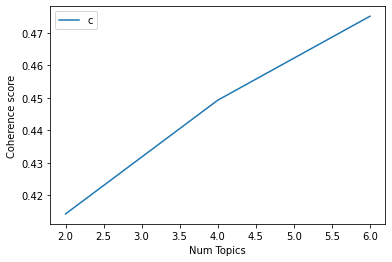

Num Topics = 2  has Coherence Value of 0.4143
Num Topics = 4  has Coherence Value of 0.4493
Num Topics = 6  has Coherence Value of 0.4751
Num Topics = 8  has Coherence Value of nan
Num Topics = 10  has Coherence Value of nan
Num Topics = 12  has Coherence Value of nan
Num Topics = 14  has Coherence Value of nan
Num Topics = 16  has Coherence Value of nan
Num Topics = 18  has Coherence Value of nan


In [90]:
cats_food_model_list, cats_food_coherence_values = compute_coherence_values(
                                                    dictionary=cats_food_dictionary, 
                                                    corpus=cats_food_doc_term_matrix, 
                                                    texts=df1_dict['cleaned_tokens2'], 
                                                    start=2, 
                                                    limit=20, 
                                                    step=2)

limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, cats_food_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
for m, cv in zip(x, cats_food_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [92]:
with open ('./model/cats_food_model_list.pickle', 'wb') as handle:
    pickle.dump(cats_food_model_list, handle)

# model interpretation

In [8]:
with open ('./model/cats_food_model_list.pickle', 'rb') as handle:
    cats_food_model_list = pickle.load(handle)

In [13]:
# for m in cats_food_model_list: 
#     print(CoherenceModel(model=m, 
#                    texts=df1_dict['cleaned_tokens2'], 
#                    dictionary=cats_food_dictionary, 
#                    coherence='c_v').get_coherence())

0.42669717925400297
0.4778350387552307
0.4641043323094533
0.4724420116771152
0.4416076894331716
0.4901907478805421
0.4840162889668878
0.47209633192702904
0.47119694188691913


In [98]:
cats_food_optimal_model = cats_food_model_list[2] #favor, ingredient, price
model_topics = cats_food_optimal_model.show_topics(formatted=False)
cats_food_optimal_model.print_topics(num_topics=6,num_words=30)

[(0,
  '0.020*"Wellness" + 0.016*"diet" + 0.013*"water" + 0.009*"raw" + 0.007*"vet" + 0.006*"company" + 0.006*"diabetic" + 0.006*"Merrick" + 0.005*"review" + 0.005*"Natures" + 0.005*"rabbit" + 0.005*"grainfree" + 0.004*"protein" + 0.004*"Instinct" + 0.004*"kidney" + 0.004*"research" + 0.004*"quality" + 0.004*"test" + 0.004*"Core" + 0.004*"mix" + 0.004*"animal" + 0.003*"kibble" + 0.003*"taste" + 0.003*"duck" + 0.003*"insulin" + 0.003*"feline" + 0.003*"Variety" + 0.003*"batch" + 0.003*"wellness" + 0.003*"level"'),
 (1,
  '0.035*"flavor" + 0.018*"variety" + 0.017*"chicken" + 0.017*"fish" + 0.015*"Feast" + 0.015*"Fancy" + 0.012*"gravy" + 0.010*"brand" + 0.009*"tuna" + 0.009*"picky" + 0.009*"meat" + 0.008*"Chicken" + 0.006*"pate" + 0.006*"salmon" + 0.006*"finicky" + 0.006*"chunk" + 0.006*"turkey" + 0.006*"pack" + 0.005*"real" + 0.005*"beef" + 0.005*"smell" + 0.005*"eater" + 0.004*"lick" + 0.004*"pouch" + 0.004*"Weruva" + 0.004*"try" + 0.004*"meal" + 0.004*"quality" + 0.004*"Tiki" + 0.004*"p

In [99]:
pyLDAvis.enable_notebook()
topic_data =  pyLDAvis.gensim_models.prepare(cats_food_optimal_model, 
                                             cats_food_doc_term_matrix, 
                                             cats_food_dictionary, 
                                             mds = 'tsne')
pyLDAvis.display(topic_data)

C:\Users\JiatingChen\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
C:\Users\JiatingChen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
